# Ettoday 網路爬蟲期末實作


* 能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構


### ① 取出今天所有的發文

In [45]:
'''
Your Code
'''
import requests, datetime
from bs4 import BeautifulSoup
today = datetime.date.today().strftime("%Y/%m/%d")
print(today)
url = 'https://www.ettoday.net/news/news-list.htm'
r = requests.get(url)
whiteSpaceRegex = " ";
# String[] words = str.split(whiteSpaceRegex);
soup = BeautifulSoup(r.text, "html5lib")

for d in soup.find(class_="part_list_2").find_all('h3'):
    dates = d.find(class_="date").text.split(whiteSpaceRegex)
    if (dates[0]==today):
        print(d.find(class_="date").text, d.find_all('a')[-1].text)


2020/02/19
2020/02/19 14:50 不斷更新／林書逸開轟　兄弟7比3領先悍將
2020/02/19 14:49 新竹市開學防疫大作戰　23日前完成校園公共環境加強消毒
2020/02/19 14:48 男子漢喜歡鋼彈錯了嗎？　桃園勇者開箱解體匠機天下知
2020/02/19 14:48 台東縣政府「關懷遊民小組」輸送溫暖　呼籲多關心家中長輩
2020/02/19 14:48 台南一藥局遭舉報高價賣口罩發國難財　老闆娘喊冤「隨便講講」送地檢署
2020/02/19 14:48 桃園加強防疫工作　失聯2天以上居家檢疫者公布姓名
2020/02/19 14:48 台東縣政府臨時抽檢雞糞清運許可　結果均符規定
2020/02/19 14:48 「二林精機園區」今下午拼闖關！環團地方互嗆　王惠美現身坐鎮
2020/02/19 14:48 利比亞首都港口遭砲擊釀3死「險炸油輪」　政府宣布中止停火談判
2020/02/19 14:46 小心LINE帳號被盜用　「LINE兩階段密碼認證」是詐騙
2020/02/19 14:46 沒羽球打了！陸出口佔全球9成　疫情導致工廠停工...球友搶購囤貨
2020/02/19 14:45 賀軍翔演台版《鬼怪》一身黑回歸　鏟肉6KG「再現鍾馗」
2020/02/19 14:44 腦退化翁「忘隔離令」外出走失！　兒無奈：衞生署拒讓父住隔離營
2020/02/19 14:43 冬季限定！手搖飲「草莓季夢幻飲品」懶人包　必喝超厚奶蓋尬10顆大湖草莓
2020/02/19 14:41 中職／赴日考察「名片收了很多張」　彭政閔對日本訓練改觀
2020/02/19 14:41 老婆婚前狂劈3男！人夫見雲端炸綠光…心碎曝「罹癌老父遺願」：要我趕快離婚
2020/02/19 14:40 實名制後沒買過口罩！整排「佛系上班族」連喊+1：看到滿滿老人直接放棄
2020/02/19 14:39 獨／180秒真沒停！阿伯挨撞戰力暴衝瞬變吵架王　警看傻：你先聽我講啦　
2020/02/19 14:38 「18歲公民權通過機率非常高」　蔡其昌：有望啟動修憲
2020/02/19 14:38 奈良鹿等待過馬路...見車禮讓「點頭鞠躬」　網驚：好有禮貌！
2020/02/19 14:36 張勛傑去年才吃蝙蝠！看到新聞傻眼「我真的有嚇到」　
2020/02/1

In [46]:

import re

class news_data:
    def __init__ (self, number, data_type, date, time):
        self.number = number
        self.data_type = data_type
        self.date = date
        self.time = time
    def __repr__(self):
        return (f'{self.__class__.__name__}('
               f'{self.number!r},{self.data_type!r}, {self.date!r}, {self.time!r})')
counter = 1
news = []
all_data_type = []
for d in soup.find(class_="part_list_2").find_all('h3'):
    number = counter
    data_type = d.find(class_= re.compile('tag c_*')).text
    all_data_type.append(data_type)
    date = d.find(class_="date").text.split(whiteSpaceRegex)[0]
    time = d.find(class_="date").text.split(whiteSpaceRegex)[1]
#     print(data_type,date, time)
#     news = news_data(data_type, date, time)  
    news.append(news_data(number, data_type, date, time))
    counter += 1
# news=sorted(news, key=lambda x:x.data_type)  
categories = set(all_data_type)
# print(categories)
# print(news)
from collections import defaultdict
dd = defaultdict(list)
for d in news:
    for c in categories:
        if (d.data_type == c):
            dd[c].append(d.number)
print(dd)    

defaultdict(<class 'list'>, {'體育': [1, 15, 28, 31, 44, 50, 55, 56, 66, 72, 76, 81, 99], '地方': [2, 4, 6, 7, 30, 43, 62], '遊戲': [3], '社會': [5, 16, 18, 24, 40, 53, 58, 59, 64, 73, 87, 92], '生活': [8, 11, 17, 22, 36, 37, 48, 51, 65, 70, 83, 88, 97], '國際': [9, 25, 26, 35, 57, 60, 78, 84, 95], '3C家電': [10], '影劇': [12, 21, 45, 52, 67, 69, 100], '大陸': [13, 32, 79], '旅遊': [14, 33, 47, 85], '政治': [19, 27, 38, 39, 41, 54, 61, 74, 75, 80, 82, 93, 94, 96], '寵物動物': [20], '論壇': [23, 29], '時尚': [34, 71, 89], '房產雲': [42], 'ET車雲': [46, 68, 86], '財經': [49, 63, 90], '健康': [77], '消費': [91], '軍武': [98]})


### ③ 哪一個類別的文章最多

In [57]:
# 設定list與迴圈
count = 1
category_list = [] # 先把類別放進來
category_count = {} # 整理各類別有多少個

for category in dd:
    category_count[category] = len(dd[category])
    

print('類別:', category_count)
print('類別最多為:', max(category_count, key = category_count.get))


類別: {'體育': 13, '地方': 7, '遊戲': 1, '社會': 12, '生活': 13, '國際': 9, '3C家電': 1, '影劇': 7, '大陸': 3, '旅遊': 4, '政治': 14, '寵物動物': 1, '論壇': 2, '時尚': 3, '房產雲': 1, 'ET車雲': 3, '財經': 3, '健康': 1, '消費': 1, '軍武': 1}
類別最多為: 政治


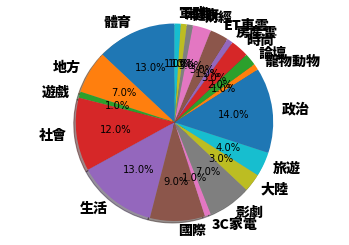

In [58]:
# way1類別視覺化
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

myfont = FontProperties(fname = r"C:\Users\user\python\scapper/NotoSansCJK-Black.ttc", size=14)

# 顯示餅圖
# patches：得到餅圖的返回值
# l_texts：餅圖外標籤的文字
# p_texts：餅圖內部文字的value
patches,l_text,p_text = plt.pie(category_count.values(), labels=category_count.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for t in l_text: 
    t.set_fontproperties(myfont)
    
# plt.legend(loc = "right", prop=myfont)

plt.show()